## 데이터불러오기

In [5]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [6]:
sec=pdr.get_data_yahoo('005930.KS',start='2018-05-04')
msft=pdr.get_data_yahoo('MSFT',start='2018-05-04')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [7]:
sec

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-05-04,53000.0,53900.0,51800.0,51900.0,47034.734375,39565391
2018-05-08,52600.0,53200.0,51900.0,52600.0,47669.113281,23104720
2018-05-09,52600.0,52800.0,50900.0,50900.0,46128.468750,16128305
2018-05-10,51700.0,51700.0,50600.0,51600.0,46762.851562,13905263
2018-05-11,52000.0,52200.0,51200.0,51300.0,46490.968750,10314997
...,...,...,...,...,...,...
2021-03-15,82800.0,82900.0,81800.0,81800.0,81800.000000,13735798
2021-03-16,82200.0,83000.0,82100.0,82800.0,82800.000000,12293537
2021-03-17,82800.0,82900.0,82000.0,82300.0,82300.000000,11625146


In [8]:
msft

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-05-03,92.959999,94.930000,92.449997,94.070000,90.382095,31142500
2018-05-04,93.320000,95.370003,92.919998,95.160004,91.429367,22531300
2018-05-07,95.169998,96.709999,95.099998,96.220001,92.447807,24242000
2018-05-08,95.849998,96.160004,95.059998,95.809998,92.053879,23484600
2018-05-09,96.010002,96.970001,95.050003,96.940002,93.139587,27327400
...,...,...,...,...,...,...
2021-03-15,234.960007,235.190002,231.809998,234.809998,234.809998,26034900
2021-03-16,236.279999,240.059998,235.940002,237.710007,237.710007,27717700
2021-03-17,236.149994,238.550003,233.229996,237.039993,237.039993,29500700


In [9]:
sec.index

DatetimeIndex(['2018-05-04', '2018-05-08', '2018-05-09', '2018-05-10',
               '2018-05-11', '2018-05-14', '2018-05-15', '2018-05-16',
               '2018-05-17', '2018-05-18',
               ...
               '2021-03-08', '2021-03-09', '2021-03-10', '2021-03-11',
               '2021-03-12', '2021-03-15', '2021-03-16', '2021-03-17',
               '2021-03-18', '2021-03-19'],
              dtype='datetime64[ns]', name='Date', length=704, freq=None)

In [10]:
sec.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

# 가져온 데이터 그래프 그려보기

In [11]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

##########한글폰트 적용
path = 'C:/Windows/Fonts/gulim.ttc'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)

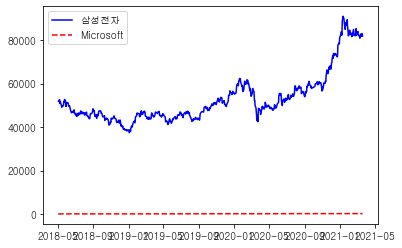

In [12]:
# plt.plot(range(50), data, 'r')
# plt.title('시간별 가격 추이', fontproperties=fontprop)
# plt.ylabel('주식 가격', fontproperties=fontprop)
# plt.xlabel('시간(분)', fontproperties=fontprop)
# plt.show()

plt.plot(sec.index, sec.Close, 'b', label='삼성전자')
plt.plot(msft.index, msft.Close, 'r--', label='Microsoft')
plt.legend(loc='best')

In [13]:
# shift?
type(sec['Close'])
sec['Close'].shift(1).head()  #데이터를 n만큼 lag

Date
2018-05-04        NaN
2018-05-08    51900.0
2018-05-09    52600.0
2018-05-10    50900.0
2018-05-11    51600.0
Name: Close, dtype: float64

In [14]:
#shift활용하여 수익률로 표현
sec_dpc=(sec['Close']/sec['Close'].shift(1)-1)*100
sec_dpc.head()

Date
2018-05-04         NaN
2018-05-08    1.348748
2018-05-09   -3.231939
2018-05-10    1.375246
2018-05-11   -0.581395
Name: Close, dtype: float64

In [15]:
sec_dpc.iloc[0]=0
sec_dpc.head()

Date
2018-05-04    0.000000
2018-05-08    1.348748
2018-05-09   -3.231939
2018-05-10    1.375246
2018-05-11   -0.581395
Name: Close, dtype: float64

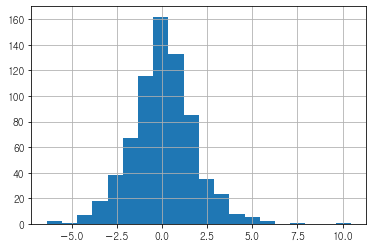

In [16]:
plt.hist(sec_dpc, bins=20)
plt.grid(True)

#x축 : 주가수익률  4~5만원이였는데 코로나 사태 이후 8만원대 이상으로 급증

In [17]:
sec_dpc.describe()

count    704.000000
mean       0.080430
std        1.772444
min       -6.387665
25%       -0.997182
50%        0.050556
75%        1.061010
max       10.470588
Name: Close, dtype: float64

In [18]:
#일간 변동률의 누적합 ~ 관측시점기준으로 최종 수익률 산출
sec_dpc_cs=sec_dpc.cumsum()
sec_dpc_cs

Date
2018-05-04     0.000000
2018-05-08     1.348748
2018-05-09    -1.883192
2018-05-10    -0.507946
2018-05-11    -1.089341
                ...    
2021-03-15    56.481514
2021-03-16    57.704008
2021-03-17    57.100143
2021-03-18    57.829183
2021-03-19    56.622911
Name: Close, Length: 704, dtype: float64

In [19]:
#Microsoft
msft_dpc = (msft['Close']/msft['Close'].shift(1)-1)*100
msft_dpc.iloc[0] = 0
msft_dpc_cs = msft_dpc.cumsum()
msft_dpc_cs.head()

Date
2018-05-03    0.000000
2018-05-04    1.158716
2018-05-07    2.272627
2018-05-08    1.846516
2018-05-09    3.025939
Name: Close, dtype: float64

In [20]:
msft_dpc_cs=msft_dpc.cumsum()
msft_dpc_cs

Date
2018-05-03      0.000000
2018-05-04      1.158716
2018-05-07      2.272627
2018-05-08      1.846516
2018-05-09      3.025939
                 ...    
2021-03-15    106.199720
2021-03-16    107.434765
2021-03-17    107.152904
2021-03-18    104.486690
2021-03-19    104.708562
Name: Close, Length: 725, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

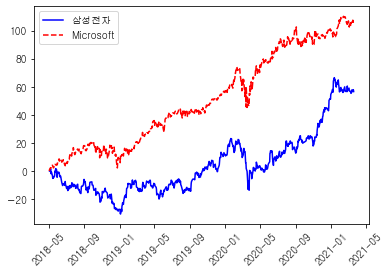

In [21]:
plt.plot(sec.index, sec_dpc_cs, 'b', label='삼성전자')
plt.plot(msft.index, msft_dpc_cs, 'r--', label='Microsoft')
plt.legend(loc='best')
plt.xticks(rotation=45)
plt.show

# MDD
- 1-(최고점/최저점)

In [22]:
kospi = pdr.get_data_yahoo('^KS11', '2004-01-04')

window=252    # 주식 개장일
peak = kospi['Adj Close'].rolling(window, min_periods=1).max()
drawdown = kospi['Adj Close']/peak - 1.0
max_dd = drawdown.rolling(window, min_periods=1).min()

[*********************100%***********************]  1 of 1 completed


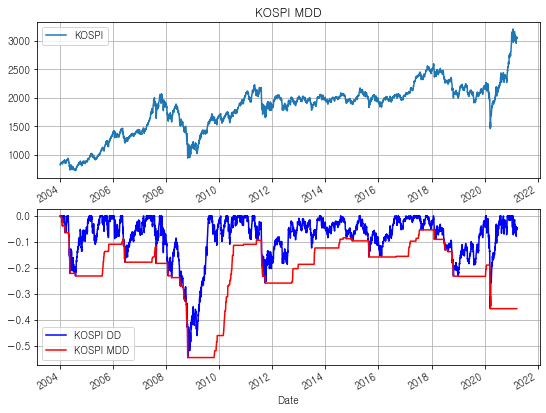

In [23]:
plt.figure(figsize=(9,7))
plt.subplot(211)
kospi['Close'].plot(label='KOSPI',title='KOSPI MDD',grid=True,legend=True)

plt.subplot(212)
drawdown.plot(c='blue',label='KOSPI DD',grid=True,legend=True)
max_dd.plot(c='red',label='KOSPI MDD',grid=True,legend=True)
plt.show()

In [24]:
max_dd.min()
max_dd[max_dd==max_dd.min()]

Date
2008-10-24   -0.545367
2008-10-27   -0.545367
2008-10-28   -0.545367
2008-10-29   -0.545367
2008-10-30   -0.545367
                ...   
2009-10-16   -0.545367
2009-10-19   -0.545367
2009-10-20   -0.545367
2009-10-21   -0.545367
2009-10-22   -0.545367
Name: Adj Close, Length: 252, dtype: float64

# 다우지수x코스피

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


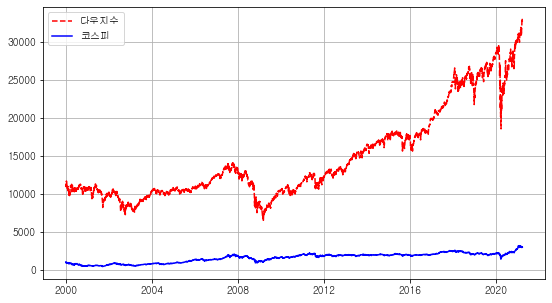

In [25]:
dow = pdr.get_data_yahoo('^DJI', '2000-01-04')
kospi = pdr.get_data_yahoo('^KS11', '2000-01-04')

plt.figure(figsize=(9,5))
plt.plot(dow.index, dow.Close, 'r--', label='다우지수')
plt.plot(kospi.index, kospi.Close, 'b', label='코스피')
plt.grid(True)
plt.legend(loc='best')
plt.show()

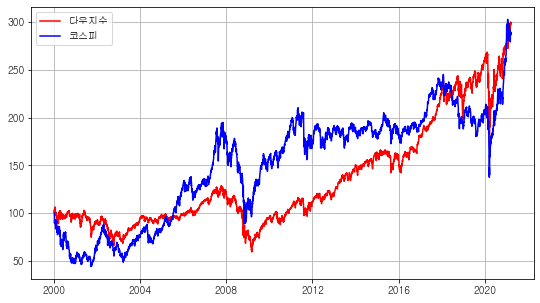

In [26]:
d = (dow.Close / dow.Close.loc['2000-01-04'])*100
k = (kospi.Close / kospi.Close.loc['2000-01-04'])*100

plt.figure(figsize=(9,5))
plt.plot(d.index, d, 'r', label='다우지수')
plt.plot(k.index, k, 'b', label='코스피')
plt.grid(True)
plt.legend(loc='best')
plt.show()

In [27]:
print('dow :',len(dow)); print('kospi :',len(kospi))
# plt.scatter(dow, kospi, marker='.')

dow : 5337
kospi : 5229


In [28]:
import pandas as pd
df = pd.DataFrame({'DOW':dow['Close'], 'KOSPI':kospi['Close']})
df

,DOW,KOSPI
Date,,
2000-01-03,11357.509766,NaN
2000-01-04,10997.929688,1059.040039
2000-01-05,11122.650391,986.309998
2000-01-06,11253.259766,960.789978
2000-01-07,11522.559570,948.650024
...,...,...
2021-03-15,32953.460938,3045.709961
2021-03-16,32825.949219,3067.169922
2021-03-17,33015.371094,3047.500000


In [29]:
df=df.fillna(method='bfill')
df=df.fillna(method='ffill')
print(df.tail())

                     DOW        KOSPI
Date                                 
2021-03-15  32953.460938  3045.709961
2021-03-16  32825.949219  3067.169922
2021-03-17  33015.371094  3047.500000
2021-03-18  32862.300781  3066.010010
2021-03-19  32692.369141  3039.530029


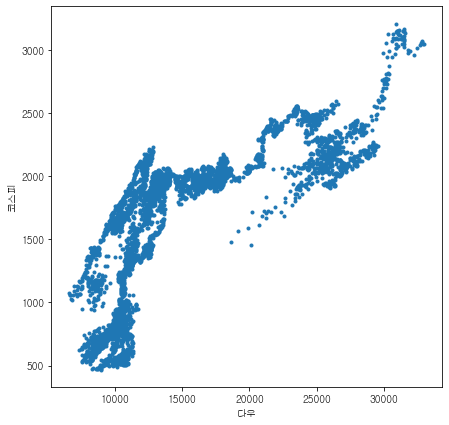

In [30]:
plt.figure(figsize=(7,7))
plt.scatter(df['DOW'],df['KOSPI'],marker='.')
plt.xlabel('다우')
plt.ylabel('코스피')
plt.show()

#다우코스피 우상향이유?

In [31]:
# pip install scipy
from scipy import stats
regr = stats.linregress(df['DOW'],df['KOSPI'])
print(regr)

LinregressResult(slope=0.077951298445792, intercept=443.92806313847154, rvalue=0.7731186956717708, pvalue=0.0, stderr=0.0008626250701246324, intercept_stderr=13.78679852869304)


In [32]:
df.corr()

,DOW,KOSPI
DOW,1.000000,0.773119
KOSPI,0.773119,1.000000


In [33]:
r_value = df['DOW'].corr(df['KOSPI'])
r_squared = r_value ** 2
print('결정계수:',r_squared)

결정계수: 0.5977125175972202


In [34]:
regr = stats.linregress(df.DOW,df.KOSPI)
regr_line = f'KOSPI = {regr.slope:.2f} * DOW + {regr.intercept:.2f}'

In [35]:
regr.slope

0.077951298445792

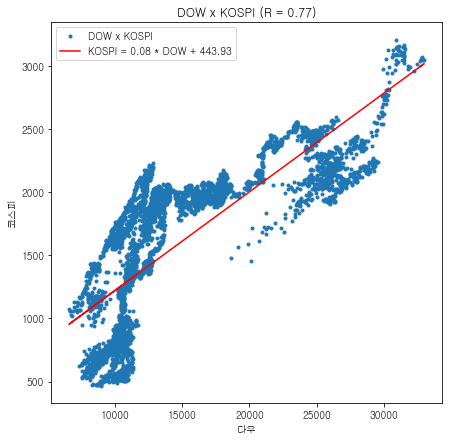

In [36]:
plt.figure(figsize=(7,7))

plt.plot(df.DOW, df.KOSPI, '.')
plt.plot(df.DOW, regr.slope * df.DOW + regr.intercept, 'r')

plt.legend(['DOW x KOSPI', regr_line])
plt.title(f'DOW x KOSPI (R = {regr.rvalue:.2f})')
plt.xlabel('다우')
plt.ylabel('코스피')
plt.show()

# 미장기국채x코스피

In [37]:
tlt = pdr.get_data_yahoo('TLT', '2002-07-30')
kospi = pdr.get_data_yahoo('^KS11', '2002-07-30')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [38]:
df = pd.DataFrame({'X':tlt['Close'], 'Y':kospi['Close']})
df = df.fillna(method='bfill')
df = df.fillna(method='ffill')

In [39]:
regr = stats.linregress(df.X, df.Y)
regr_line = f'Y = {regr.slope:2f}  X + {regr.intercept:2f}'

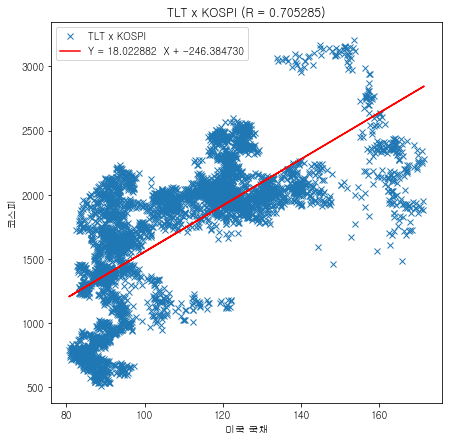

In [40]:
plt.figure(figsize=(7, 7))
plt.plot(df.X, df.Y, 'x') 
plt.plot(df.X, regr.slope * df.X + regr.intercept, 'r')

plt.legend(['TLT x KOSPI', regr_line])
plt.title(f'TLT x KOSPI (R = {regr.rvalue:2f})')
plt.xlabel('미국 국채')
plt.ylabel('코스피')
plt.show()

# 미국채금리상승 ~ 국채가격하락, 주식하락

# 미국채이자 상승 이슈

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

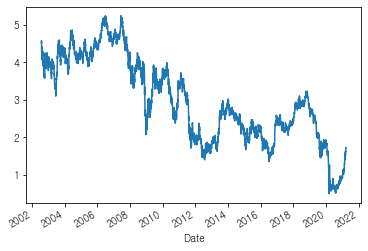

In [41]:
# 미국채권금리
TNX = pdr.get_data_yahoo('^TNX', '2002-07-30')
TNX['Close'].plot()

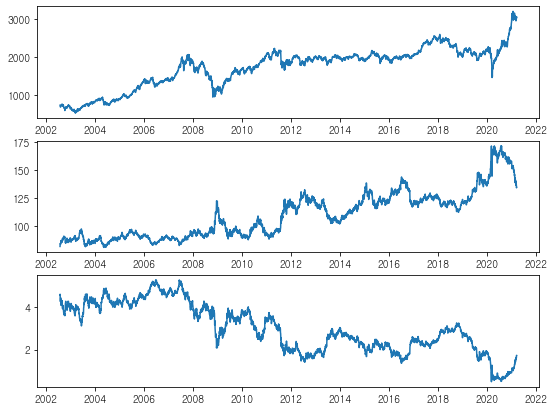

In [42]:
plt.figure(figsize=(9,7))

#코스피
plt.gca().title.set_text('kospi')
plt.subplot(311)
plt.plot(kospi['Close'])

#미국장기채권가격
plt.subplot(312)
plt.plot(tlt['Close'])

#미국장기채권금리
plt.subplot(313)
plt.plot(TNX['Close'])


plt.show()

In [43]:
# http://plus.hankyung.com/apps/newsinside.view?aid=2021030710211&category=NEWSPAPER

In [51]:
dow2 = pdr.get_data_yahoo('^DJI', '2002-07-30')
dow2 = dow2.fillna(method='bfill')
dow2 = dow2.fillna(method='ffill')

[*********************100%***********************]  1 of 1 completed


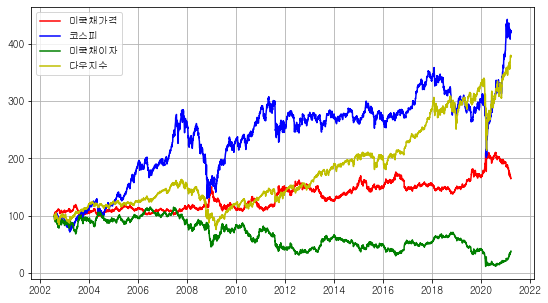

In [57]:
d = (tlt.Close / tlt.Close.loc['2002-07-30'])*100
k = (kospi.Close / kospi.Close.loc['2002-07-30'])*100
c = (TNX.Close / TNX.Close.loc['2002-07-30'])*100
j = (dow2.Close / dow2.Close.loc['2002-07-30'])*100

plt.figure(figsize=(9,5))
plt.plot(d.index, d, 'r', label='미국채가격')
plt.plot(k.index, k, 'b', label='코스피')
plt.plot(c.index, c, 'g', label='미국채이자')
plt.plot(j.index, j, 'y', label='다우지수')

plt.grid(True)
plt.legend(loc='best')
plt.show()

In [45]:
# 장기국채이자상승 ~ 통화정책, 채권가격, 인플레이션

In [46]:
# 주식(위험자산)과 채권(안전자산)은 대체자산(이자율에 반대로 움직임)  
# but 추세적 동반상향  ; 확장적통화정책 : 채권매입으로 수요증가하여 채권가격 상승 + 낮은 이자율로 기업투자 활발